In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
destination_matrix = pd.read_csv('travels_hotmap/flux.csv', sep=' ')
travels = pd.read_csv('travels.csv')

In [14]:
# Column = Target, Line = Source
destination_matrix.head()

,Dunbar Southlands,Hastings-Sunrise,Mount Pleasant,Fairview,Downtown,West End,Killarney,Kerrisdale,Sunset,Marpole,...,Downtown Eastside,Strathcona,BCIT,Metrotown,BurnabyMountain,SeaIsland,NewWestminster,NorthVancouver,Grousewoods,UBC
Dunbar Southlands,8440,112,615,965,1821,597,27,370,93,142,...,313,103,19,36,2,160,59,102,8,1713
Hastings-Sunrise,121,15422,2032,1018,3239,1133,127,51,205,200,...,1732,356,184,242,132,249,438,1427,66,308
Mount Pleasant,586,2019,33690,5928,8316,4465,230,286,687,487,...,4389,1280,195,170,116,288,589,1188,104,1225
Fairview,908,891,5904,27134,8322,4409,150,380,515,582,...,2754,961,161,221,85,292,423,760,93,1671
Downtown,1266,2667,8635,8173,54002,10121,238,469,611,759,...,5120,1323,188,351,259,273,976,2635,341,2017


In [15]:
travels.head()

,Start_time,End_time,Id,Start_lat,Start_lon,End_lat,End_lon,Maps_duration,Real_duration,Fuel_start,Fuel_end
0,2018-03-01 08:26:55.380077-08:00,2018-03-01 08:33:09.325978-08:00,JTDKDTB38H1597538,49.259346,-123.122070,49.262367,-123.113274,4.416667,6.232432,52,58
1,2018-03-01 08:26:55.380077-08:00,2018-03-01 08:33:09.325978-08:00,JTDKDTB35J1606797,49.249508,-123.137482,49.249508,-123.137482,0.000000,6.232432,85,85
2,2018-03-01 08:26:55.380077-08:00,2018-03-01 08:36:16.682113-08:00,JTDKDTB33H1598015,49.270780,-123.071480,49.270780,-123.071480,0.000000,9.355034,85,85
3,2018-03-01 08:30:02.405985-08:00,2018-03-01 08:36:16.682113-08:00,JTDKDTB32F1111738,49.256530,-123.186462,49.256530,-123.186462,0.000000,6.237935,64,64
4,2018-03-01 08:26:55.380077-08:00,2018-03-01 08:39:23.591149-08:00,JTDKDTB34H1598038,49.254760,-123.097260,49.254760,-123.097260,0.000000,12.470185,77,77


In [16]:
num_viagens = len(travels)
num_viagens

1003249

In [17]:
# Porcentagem relativa a quantidade de viagem que sairam de tal distrito
dm_source = destination_matrix.copy()
for source in destination_matrix.index:
    sum = dm_source.loc[source].sum()
    # Todas as viagem de tal distrito divididas pela quantidade de viagens que sairam do mesmo
    dm_source.loc[source] /= sum
    dm_source.loc[source] *= 100

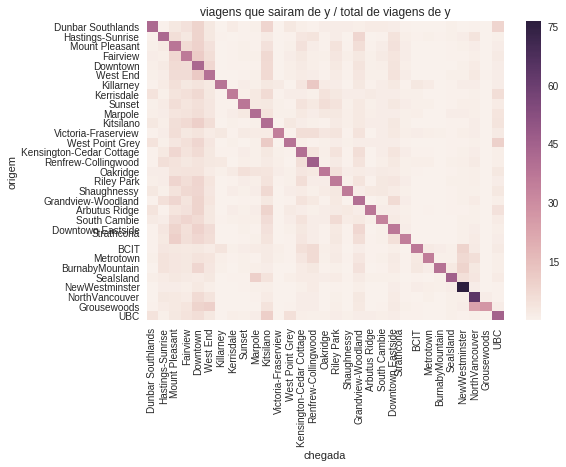

In [18]:
sns.heatmap(dm_source)
plt.title('viagens que sairam de y / total de viagens de y')
plt.xlabel('chegada')
plt.ylabel('origem')
plt.savefig('norm_saida.pdf',bbox_inches='tight')
plt.show()

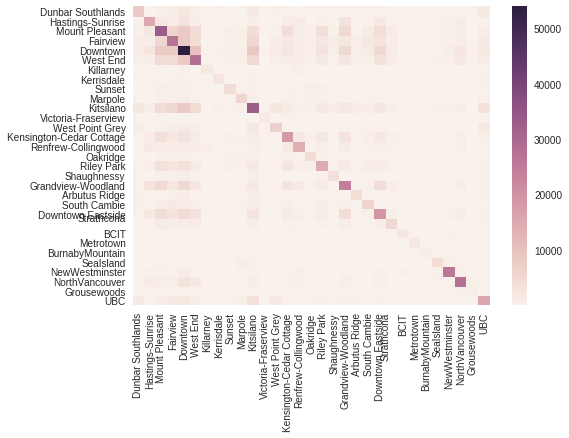

In [133]:
sns.heatmap(destination_matrix)
plt.savefig('travels_hotmap/destination_matrix_todos_distritos.pdf',bbox_inches='tight')
plt.show()

In [19]:
saida = pd.DataFrame()
chegada = pd.DataFrame()
saida['district'] = destination_matrix.index
chegada['district'] = destination_matrix.index
saida['value'] = [0] * len(saida)
chegada['value'] = [0] * len(saida)
c = 0
for i in range(len(saida)):
    district = saida['district'].iloc[i]
    # Line = Source
#     print('saida'+str(100 * destination_matrix.loc[district].sum()/num_viagens))
    saida['value'].iloc[i] = 100 * destination_matrix.loc[district].sum()/num_viagens
    
    # Column = Target
#     print('chegada'+str(100*destination_matrix[district].sum()/num_viagens))
    chegada['value'].iloc[i] = 100 * destination_matrix[district].sum()/num_viagens

/home/victor/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


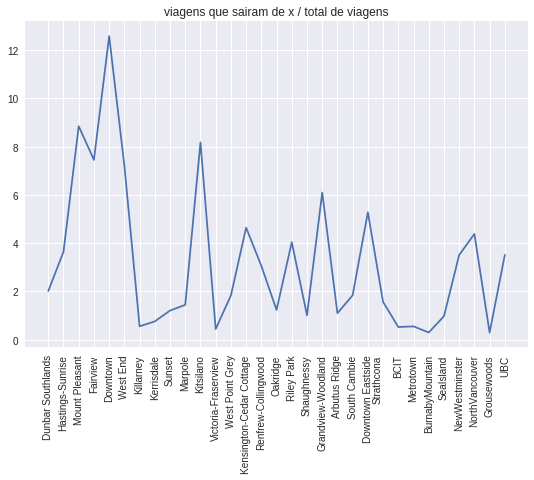

In [20]:
f, ax = plt.subplots(figsize=(9, 6))
plt.title('viagens que sairam de x / total de viagens')
plt.plot(saida['district'],saida['value'])
plt.xticks(rotation=90)
plt.savefig('sairam.pdf',bbox_inches='tight')
plt.show()

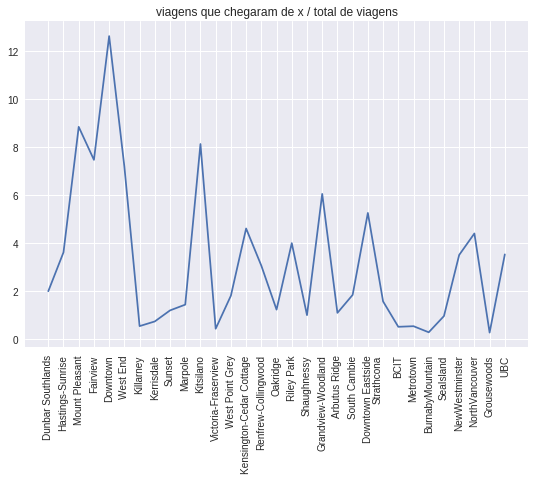

In [21]:
f, ax = plt.subplots(figsize=(9, 6))
plt.title('viagens que chegaram de x / total de viagens')
plt.plot(chegada['district'],chegada['value'])
plt.xticks(rotation=90)
plt.savefig('chegaram.pdf',bbox_inches='tight')
plt.show()

In [18]:
saida.head(8)

,district,value
0,Dunbar Southlands,2.012462
1,Hastings-Sunrise,3.639974
2,Mount Pleasant,8.846458
3,Fairview,7.448300
4,Downtown,12.582220
5,West End,7.211570
6,Killarney,0.550511
7,Kerrisdale,0.754548


In [17]:
chegada.head(8)

,district,value
0,Dunbar Southlands,2.005484
1,Hastings-Sunrise,3.624026
2,Mount Pleasant,8.841972
3,Fairview,7.468834
4,Downtown,12.615413
5,West End,7.190438
6,Killarney,0.555196
7,Kerrisdale,0.750163
